In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad

In [2]:
def solve(function, sections, time, params):
    '''
    This function computes the data arrays using a solution function 
    '''
    u_res = []
    for eta in sections:
        u_res.append(np.array([function(eta, el, params) for el in time]))
    u_resnp = np.array(u_res)
    return u_resnp

In [48]:
def T_sections(x_range, function, time_sections, params):
    u_res = []
    for time in time_sections:
        u_res.append(np.array([function(x, time, params) for x in x_range]))
    u_resnp = np.array(u_res)
    return u_resnp

In [61]:
def plot_results(x_axis, results, sections=None, figname=None, size='normal', **axis):
    fig = plt.figure()
    if size == 'large':
        size_num = (9, 15)
    elif size == 'custom':
        size_num = (8, 8)
    else:
        size_num = (6, 10)
    if size != 'default':
        fig.set_figheight(size_num[0])
        fig.set_figwidth(size_num[1])

    lgd = r'$\eta$'
    if axis:
        plt.xlabel(axis['xl'])
        plt.ylabel(axis['yl'])
        if axis['title'] is not None:
            plt.title(axis['title'])
        if axis['lgd'] is not None:
            lgd = axis['lgd']
    
    if sections is not None:    
        for ind, sect in enumerate(sections):
            plt.plot(x_axis, results[ind], label= lgd + ' = ' + str(sect))
        plt.legend()
    else:
        plt.plot(x_axis, results)
    
    plt.grid()
    
    
    if figname is not None:
        fig.savefig(f'graphs/{figname}.pdf')
    plt.show()

In [41]:
def M(q, tau, tau_m):
    brq4tau1 = 1 + q**4 + 1/tau_m**2
    sqrt1q4 = np.sqrt(1+q**4)
    return (np.sin(tau*sqrt1q4-2*np.arctan(tau_m*sqrt1q4)))/(sqrt1q4*brq4tau1) + np.exp(-tau/tau_m)*(tau/brq4tau1 + 2/(tau_m*brq4tau1**2))

#infinite flexible shell/rod_on_a_flexible_platform
def integrand(q, tau, tau_m, alpha):
    return np.exp(-q**2/(4*alpha**2)) * M(q, tau, tau_m)

def w(eta, tau, params):
    alpha, tau_m, I_star = params
    val, _ = quad(integrand, 0, 20, args=(tau, tau_m, alpha), 
                  weight='cos', wvar=eta, limit=100, epsabs=1e-4)
    return I_star/(tau_m**2*alpha*np.sqrt(np.pi)) * val

#impulse force Heaviside*Dirac
def integrand2(q,t):
    return (1-np.cos(np.sqrt(1+q**4)*t))/(1+q**4)

def w2(x, t, params):
    val, _ = quad(integrand2, 0, 20, args=(t), 
                  weight='cos', wvar=x, limit=500, epsabs=1e-4)
    return val/(2*np.pi)

#edge effect (semi-infinite flexible shell/rod_on_a_flexible_platform) - FAIL
def integrand1(q, tau, tau_m):
    return M(q, tau, tau_m)

def w1(eta, tau, params):
    tau_m, I_star = params
    val, _ = quad(integrand1, 0, 20, args=(tau, tau_m), 
                  weight='cos', wvar=eta, limit=100, epsabs=1e-4)
    return np.sqrt(2)*I_star/(tau_m**2*np.sqrt(np.pi)) * val

## Изгибные волны в бесконечной цилиндрической оболочке

In [62]:
tau = np.linspace(0, 8, 101)
alpha = 1
tau_m = 2
I_star = 1
params = (alpha, tau_m, I_star)
etas = [3, 2, 1, 0]
w_solution = solve(w, etas, tau, params)

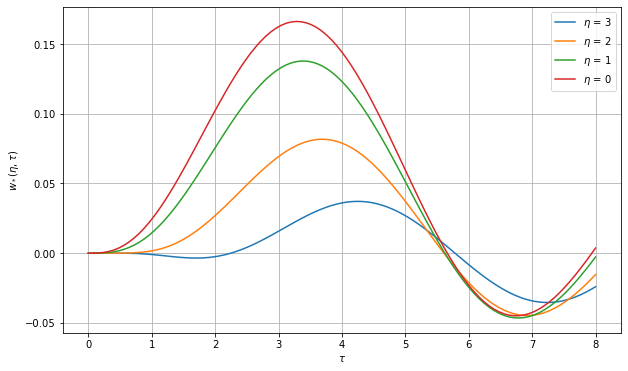

In [64]:
figname = 'transverse_osc_par=(1,2,1),etas=[3,2,1,0]'
plot_results(tau, w_solution, etas, figname=None, 
             lgd=r'$\eta$', xl=r'$\tau$', yl=r'$w_*(\eta,\tau)$', title=None)

## Точечная нагрузка

In [65]:
t = np.linspace(0, 8, 201)
etas = [3, 2, 1, 0]
w_sol2 = solve(w2, etas, t, ())

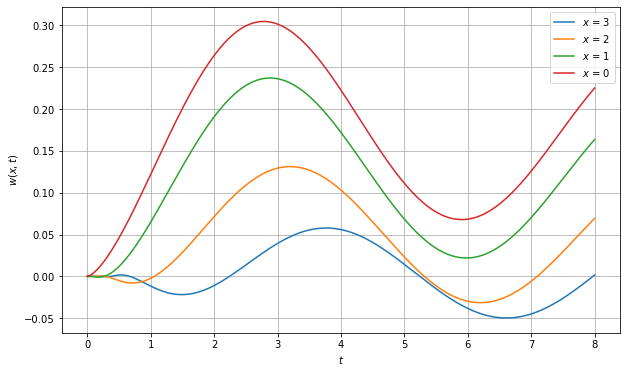

In [67]:
figname = 'transverse_osc_point_force,x=[3, 2, 1, 0]'
plot_results(t, w_sol2, etas, figname=None, 
             lgd=r'$x$', xl=r'$t$', yl=r'$w(x,t)$', title=None)

### Точечная нагрузка: сечения

In [68]:
x = np.linspace(0, 15, 101)
times = [0.2, 1, 4, 9]
w_sections = T_sections(x, w2, times, ())

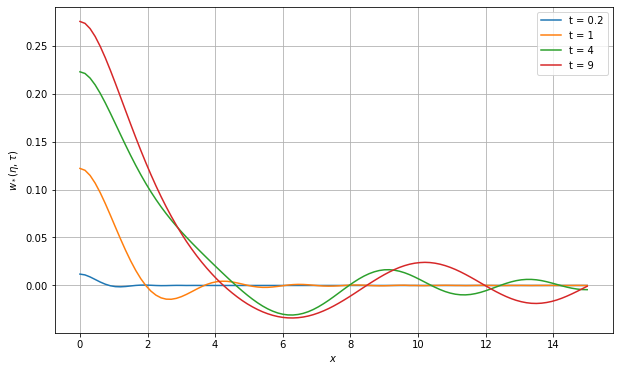

In [70]:
figname1 = 'transverse_osc_point_force,times=[0, 1, 4, 9]'
plot_results(x, w_sections, times, figname=None, 
             lgd=r't', xl=r'$x$', yl=r'$w_*(\eta,\tau)$', title=None)

## Изгибные волны в полубесконечной защемленной цилиндрической оболочке

In [11]:
tau1 = np.linspace(0, 8, 101)
tau_m = 2
I_star = 1
params1 = (tau_m, I_star)
etas = [2, 1, 0.5, 0]
w_solution1 = solve(w1, etas, tau1, params1)

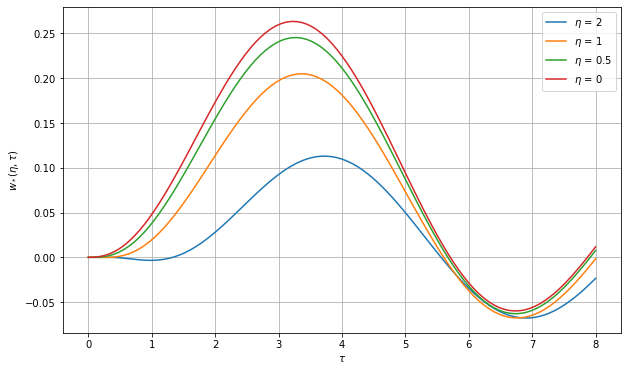

In [12]:
figname = 'transverse_osc_semi_infinite_par=(2,1),etas=[2,1,0.5,0]'
plot_results(tau1, w_solution1, etas, figname=None, 
             xl=r'$\tau$', yl=r'$w_*(\eta,\tau)$', title=None)